In [4]:
import pandas as pd
import json
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import numpy as np

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
# Inicializa una lista vacía para almacenar los datos
data = []

# Define el tamaño del 'chunk'
chunksize = 1000

# Utiliza un iterador para leer el archivo en 'chunks'
for chunk in pd.read_json("/content/drive/MyDrive/PF/review.json", lines=True, chunksize=chunksize):
    # Procesa cada 'chunk' como desees
    data.append(chunk)

# Combina todos los 'chunks' en un solo DataFrame
df_review = pd.concat(data)


In [6]:
# revisamos la informacion de nuestro DataFrame
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 480.0+ MB


In [7]:
# Revisamos la cantidad de datos nulos en el Dataset
df_review.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [8]:
# revisamos si existen datos duplicados en Dataset
df_review.duplicated().sum()

0

In [9]:
df_review

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


In [10]:
# obtenemos los datos estadisticos de nuestrsas columnas numericas
df_review.describe()

,stars,useful,funny,cool
count,6.990280e+06,6.990280e+06,6.990280e+06,6.990280e+06
mean,3.748584e+00,1.184609e+00,3.265596e-01,4.986175e-01
std,1.478705e+00,3.253767e+00,1.688729e+00,2.172460e+00
min,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,1.182000e+03,7.920000e+02,4.040000e+02


In [11]:
sid = SentimentIntensityAnalyzer()

In [12]:
# Extraemos los datos a partir del año 2016
df_r_red = df_review[(df_review['date'].dt.year >= 2016) & (df_review['date'].dt.year <= df_review['date'].dt.year.max())].reset_index(drop=True)


In [13]:
df_r_red

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
2,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3,1,1,0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33
3,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06
4,u2vzZaOqJ2feRshaaF1doQ,NDZvyYHTUWWu-kqgQzzDGQ,CLEWowfkj-wKYJlQDqT1aw,5,2,0,1,I go to blow bar to get my brows done by natal...,2016-03-07 00:02:18
...,...,...,...,...,...,...,...,...,...
4596982,zHZ-A1qyKDEgyZMDaD--wg,_XVdmFWSgTN6YlojUxixTA,6WaI-IN8ql0xpEKlb4q8tg,5,1,0,0,We redesigned my moms dress and mad it complet...,2022-01-17 20:59:01
4596983,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
4596984,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
4596985,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


In [14]:
# declaramos la variable stars para contar los valores de la columna stars
stars = df_r_red['stars'].value_counts()
stars

5    2320199
1     785619
4     777517
3     381837
2     331815
Name: stars, dtype: int64

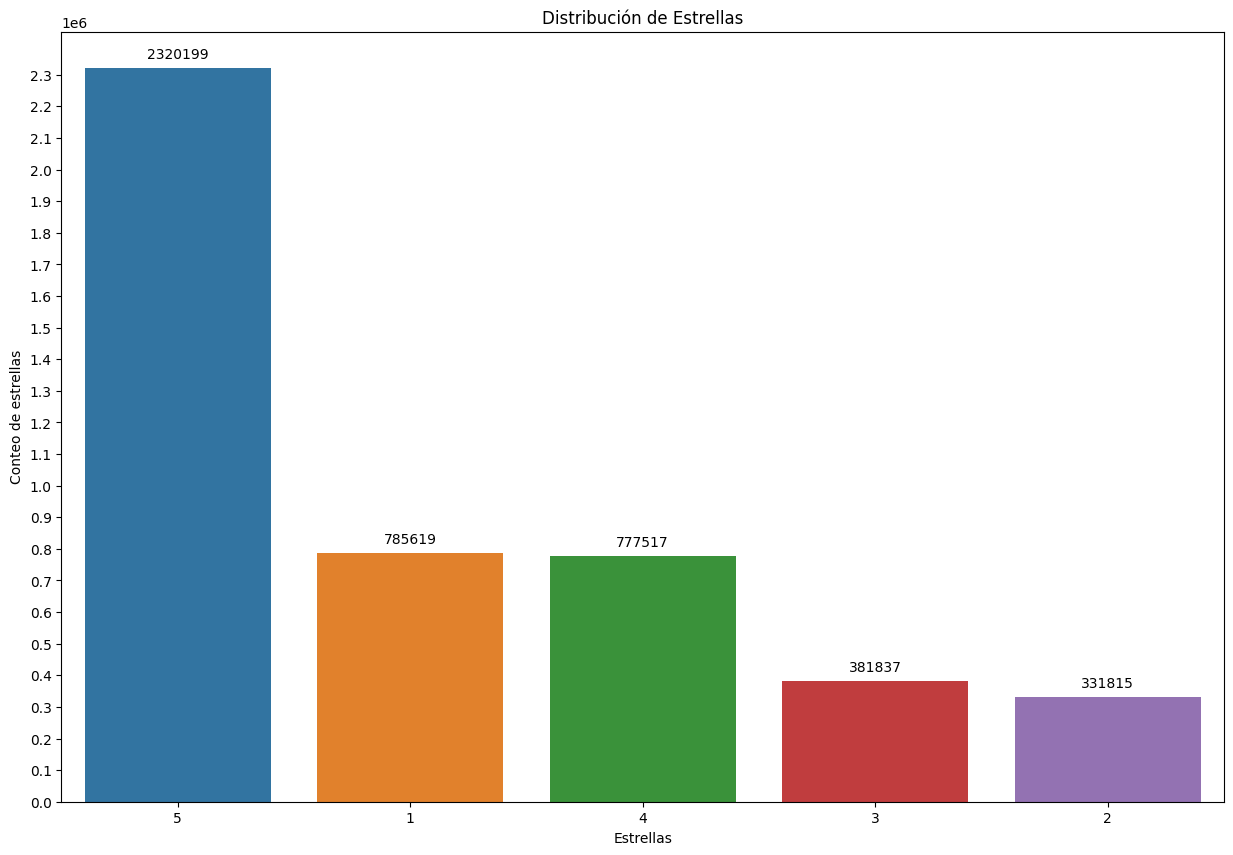

In [15]:
# Convertimos los índices a strings
stars.index = stars.index.astype(str)

#creamos el grafico
plt.figure(figsize=(15,10))
barplot = sns.barplot(x=stars.index, y=stars.values,hue=stars.index)

plt.xticks(range(len(stars.index)), stars.index)  # Añadimos las etiquetas del eje x
plt.yticks(range(0, max(stars.values)+1, 100000))  # Añadimos las etiquetas del eje y con un paso de 100000
plt.xlabel("Estrellas")
plt.ylabel("Conteo de estrellas")
plt.title('Distribución de Estrellas')  # Añadimos un título

# Añadimos anotaciones en cada barra
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

plt.show()

Se puede observar un predominio de 5 estrellas: La mayoría de las calificaciones son de 5 estrellas, con un total de 2,320,199 calificaciones. Esto indica una alta satisfacción general.
Menor cantidad para 1, 2 y 4 estrellas: Las calificaciones de 1 y 4 estrellas tienen más de 700,000 cada una, pero son significativamente menores que las de 5 estrellas.
Mínima cantidad para 2 y 3 estrellas: Las calificaciones de 2 y 3 estrellas son las más bajas, con alrededor de 380,000 cada una.
En resumen, el gráfico muestra una tendencia hacia calificaciones más altas, lo que sugiere una percepción positiva general.

In [16]:
df_r_red['useful'].value_counts()

0      2744887
1       982396
2       395670
3       182765
4        94134
        ...   
195          1
198          1
222          1
205          1
207          1
Name: useful, Length: 210, dtype: int64

In [17]:
df_r_red['funny'].value_counts()

0      4019095
1       388113
2        94348
3        36910
4        18534
        ...   
254          1
141          1
157          1
133          1
180          1
Name: funny, Length: 131, dtype: int64

In [18]:
df_r_red['cool'].value_counts()

0      3651804
1       609951
2       162591
3        60495
4        29943
        ...   
157          1
151          1
140          1
148          1
304          1
Name: cool, Length: 183, dtype: int64

In [19]:
df_r_red['year'] = df_r_red['date'].dt.year

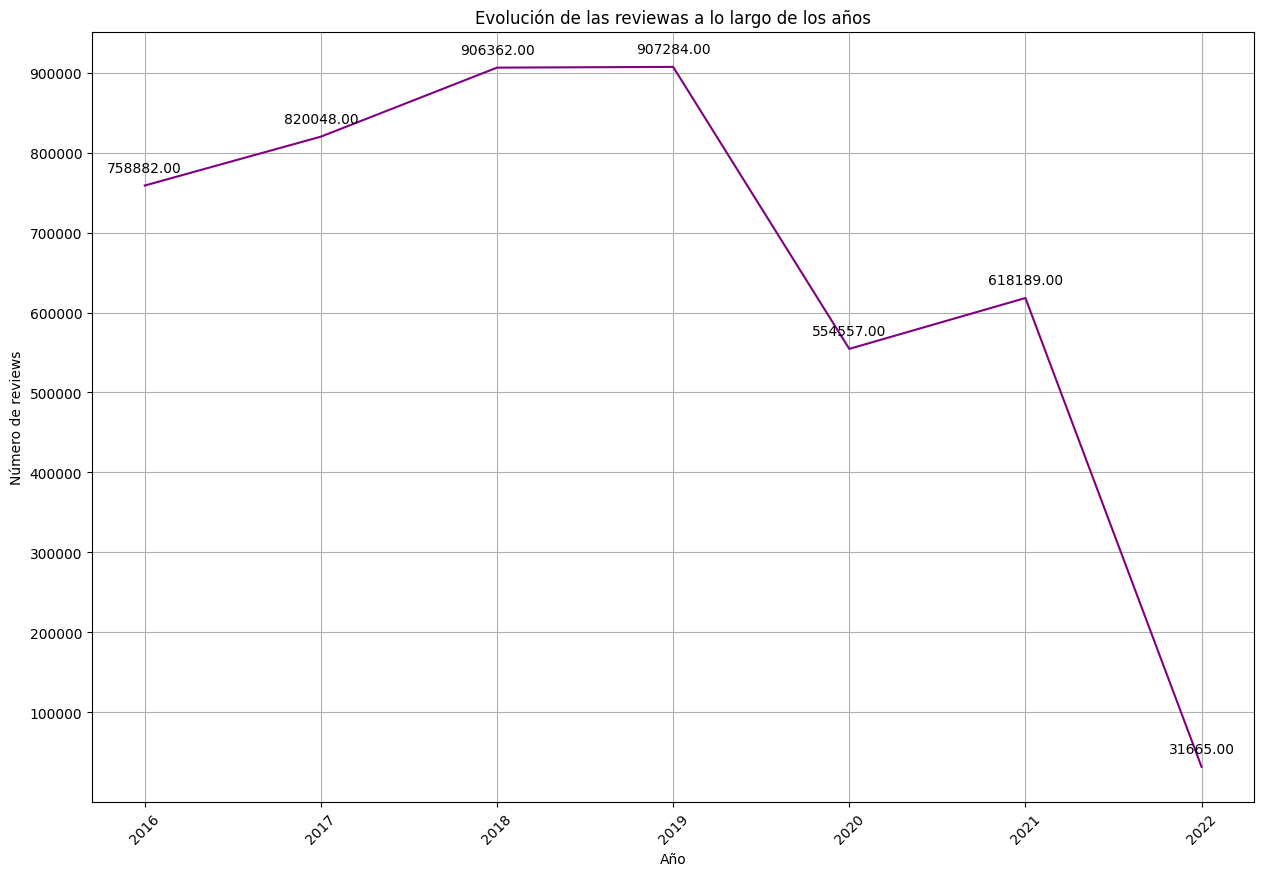

In [20]:
reviews_per_year = df_r_red['year'].value_counts().sort_index()

plt.figure(figsize=(15,10))
sns.lineplot(x=reviews_per_year.index, y=reviews_per_year.values, color='purple')

plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para mejorar la legibilidad
plt.yticks(range(100000, max(reviews_per_year.values)+1, 100000))  # Ajustamos la escala del eje y para que comience en 100000
plt.xlabel("Año")
plt.ylabel("Número de reviews")
plt.title('Evolución de las reviewas a lo largo de los años')
for x, y in zip(reviews_per_year.index, reviews_per_year.values):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.show()

El gráfico muestra la cantidad de reseñas cada año desde 2016 hasta 2022. Aquí están las conclusiones generales:

Incremento hasta 2018: Las reseñas aumentaron de 758,882 en 2016 a un pico de 907,284 en 2018.
Disminución después de 2018: Después de 2018, el número de reseñas disminuyó significativamente, llegando a 318,965 en 2022. esto pudo ser ocasionado por la pandemia global que surgio a finales de 2021

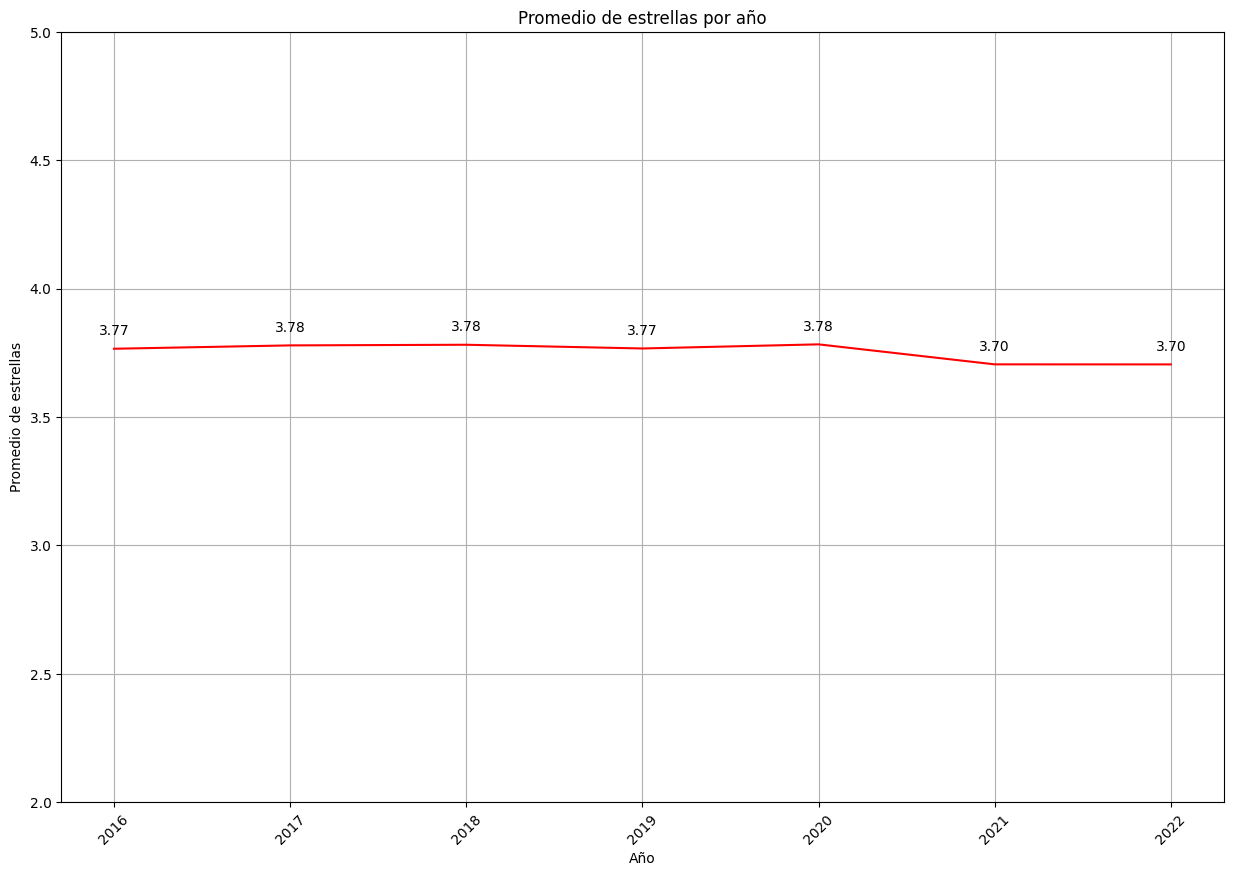

In [27]:
average_stars_per_year = df_r_red.groupby('year')['stars'].mean()

plt.figure(figsize=(15,10))
sns.lineplot(x=average_stars_per_year.index, y=average_stars_per_year.values, color='red')

plt.xticks(average_stars_per_year.index,rotation=45)  # Rotamos las etiquetas del eje x para mejorar la legibilidad
plt.yticks(np.arange(2, 5.1, .5))  # Ajustamos la escala del eje y para que vaya de 1 a 5
plt.xlabel("Año")
plt.ylabel("Promedio de estrellas")
plt.title('Promedio de estrellas por año')

for x, y in zip(average_stars_per_year.index, average_stars_per_year.values):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.show()

se puede observar una Estabilidad hasta 2020: El promedio de estrellas se mantuvo relativamente estable alrededor de 3.77 y 3.78 desde 2016 hasta 2020.
Disminución en 2021 y 2022: A partir de 2021, el promedio de estrellas comenzó a disminuir, llegando a 3.70 en 2021 y disminuyendo aún más a 3.7 en 2022.
En resumen, el gráfico muestra una tendencia de estabilidad en el promedio de estrellas hasta 2020, seguida de una disminución en los años siguientes.

### _FEATURE ENGINEERING_
* Como parte de los insight se puede obtener un resultado de las reviews de cada ususario por los comentarios con NLP


